In [1]:
# https://cran.r-project.org/web/views/TimeSeries.html
# https://www.datacamp.com/tracks/time-series-with-r
# https://www.datascience.com/blog/introduction-to-forecasting-with-arima-in-r-learn-data-science-tutorials
# https://www.otexts.org/fpp/8/7

In [2]:
library(gdata)
library(MASS)
library(imputeTS)
library(tseries)
library(forecast)
library(fUnitRoots)
library(portes)
library(nortest)
library(tsoutliers)
library(boot)

gdata: read.xls support for 'XLS' (Excel 97-2004) files ENABLED.


gdata: read.xls support for 'XLSX' (Excel 2007+) files ENABLED.



Attaching package: ‘gdata’



The following object is masked from ‘package:stats’:

    nobs



The following object is masked from ‘package:utils’:

    object.size



The following object is masked from ‘package:base’:

    startsWith




Attaching package: ‘tseries’



The following object is masked from ‘package:imputeTS’:

    na.remove



Loading required package: timeDate


Loading required package: timeSeries


Loading required package: fBasics


Loading required package: parallel


In [3]:
T <- read.xls("Dados.xlsx", sheet = 1, header = TRUE, stringsAsFactors = FALSE)

In [4]:
head(T)

Ano Mes AnoF AnoF2 INMET AGRITEM ICEA 
 
 1961 1 22296 1961.04 26.38 NA NA 
 1961 2 22327 1961.13 26.54 NA NA 
 1961 3 22355 1961.21 26.70 NA NA 
 1961 4 22386 1961.29 26.65 NA NA 
 1961 5 22416 1961.38 25.50 NA NA 
 1961 6 22447 1961.46 22.78 NA NA

In [5]:
sapply(T, class) # Verificando os tipos

Ano 
 'integer' 
 Mes 
 'integer' 
 AnoF 
 'integer' 
 AnoF2 
 'numeric' 
 INMET 
 'numeric' 
 AGRITEM 
 'numeric' 
 ICEA 
 'numeric'

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1961 26.38 26.54 26.70 26.65 25.50 22.78 23.34 27.72 28.90 27.69 27.37 26.92
1962 26.43 26.85 27.18 26.13 24.49 22.36 20.55 25.37 27.94 26.43 28.49 26.34
1963 26.39 26.24 26.34 26.57 24.75 22.97 23.63 26.74 28.01 29.04 28.10 28.49
1964 27.64 27.46 26.70 27.59 24.57 23.51 22.70 27.69 27.46 26.44 27.01 26.44
1965 26.57 26.54 25.36 25.90 25.67 25.10 23.96 26.33 27.44 27.19 27.07 27.09
1966 27.30 26.33 26.91 26.45 25.49 24.68 24.61 24.32 26.83 28.07 28.12 28.44
1967 27.49 26.15 26.37 25.64 23.66 22.02 22.37 25.11 28.03 27.83 26.88 26.88
1968 26.19 25.62 25.98 23.72 20.93 21.78 22.03 24.92 24.49 27.01 28.04 26.12
1969 26.58 26.61 26.72 26.11 24.55 23.03 21.83 23.83 28.04 26.94 27.43 26.94
1970 27.19 26.33 26.47 26.30 23.58 22.74 21.36 23.56 27.11 27.52 27.77 27.15
1971 26.57 25.59 26.06 24.88 22.78 20.92 21.88 23.21 27.09 25.90 26.44 26.64
1972 26.08 25.88 26.57 23.99 24.95 23.25 22.16 24.63 27.19 27.52 27.29 27.08

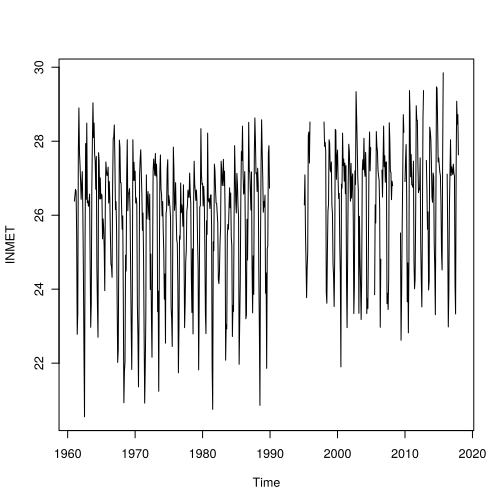

In [6]:
INMET <- ts(T$INMET,start=c(1961,1),f=12)
INMET
plot(INMET)

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1961       NA       NA       NA       NA       NA       NA       NA       NA
1962       NA       NA       NA       NA       NA       NA       NA       NA
1963       NA       NA       NA       NA 25.39000 24.90000 25.71000 28.59000
1964 28.44000 28.25000 27.63000 28.76000 25.80000 24.73000 23.76000 29.25000
1965 27.45000 27.47000 26.37000 26.92000 26.84000 26.65000 25.20000 27.76000
1966 27.89000 27.09000 27.50000 27.82000 26.68000 26.04000 26.30000 26.13000
1967 28.59000 27.96000 28.08000 27.01000 27.53000 24.56000 26.27000 29.12000
1968 27.99000 27.06000 27.69000 26.02000 24.07000 26.19000 26.61000 27.75000
1969 28.37000 28.02000 28.78000 28.54000 27.77000 25.76000 26.32000 27.01000
1970 28.83000 27.50000 28.95000 28.41000 26.15000 26.52000 25.37000 27.75000
1971 27.90000 27.16000 27.80000 27.08000 25.06000 24.12000 25.81000 27.12000
1972 27.83000 27.38000 28.06000 26.61000 28.48000 27.10000 25.48000 26.78000

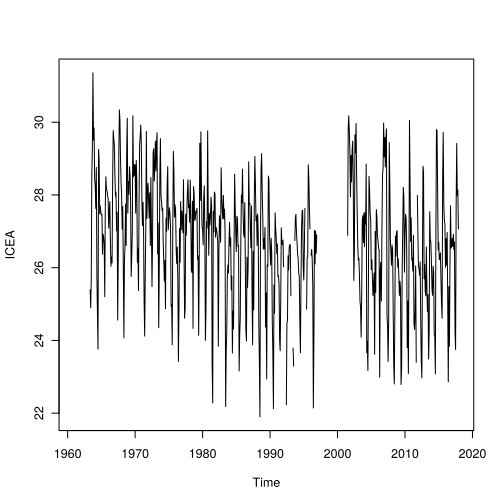

In [49]:
ICEA <- ts(T$ICEA,start=c(1961,1),f=12)
ICEA
plot(ICEA, cex.lab=1.5, cex.axis=2)

# cex.main: Size of main title
# cex.lab: Size of axis labels (the text describing the axis)
# cex.axis: Size of axis text (the values that indicate the axis tick labels)

Observe que as séries possuem falhas. Inicialmente as preencheremos com uma regressão entre INMET e ICEA.

In [8]:
mod1 = lm(INMET ~ ICEA, data = T)
summary(mod1)


Call:
lm(formula = INMET ~ ICEA, data = T)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7194 -0.6334 -0.0078  0.7152  5.7882 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.38188    0.81258   5.393 1.08e-07 ***
ICEA         0.80299    0.03012  26.659  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.13 on 493 degrees of freedom
  (189 observations deleted due to missingness)
Multiple R-squared:  0.5904,	Adjusted R-squared:  0.5896 
F-statistic: 710.7 on 1 and 493 DF,  p-value: < 2.2e-16


In [9]:
aux <- T[is.na(T$INMET)&!is.na(T$ICEA),]

In [10]:
aux <- predict(mod1, newdata=T[is.na(T$INMET)&!is.na(T$ICEA),]) # Estima INMET com base no ICEA

In [11]:
head(aux)

349 
 26.4800887468442 
 350 
 26.0705653435554 
 351 
 26.8093134436057 
 352 
 26.3917601696642 
 353 
 24.5047405662748 
 354 
 23.6294846651282

In [12]:
T[is.na(T$INMET)&!is.na(T$ICEA),] <- aux

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1961 26.38000 26.54000 26.70000 26.65000 25.50000 22.78000 23.34000 27.72000
1962 26.43000 26.85000 27.18000 26.13000 24.49000 22.36000 20.55000 25.37000
1963 26.39000 26.24000 26.34000 26.57000 24.75000 22.97000 23.63000 26.74000
1964 27.64000 27.46000 26.70000 27.59000 24.57000 23.51000 22.70000 27.69000
1965 26.57000 26.54000 25.36000 25.90000 25.67000 25.10000 23.96000 26.33000
1966 27.30000 26.33000 26.91000 26.45000 25.49000 24.68000 24.61000 24.32000
1967 27.49000 26.15000 26.37000 25.64000 23.66000 22.02000 22.37000 25.11000
1968 26.19000 25.62000 25.98000 23.72000 20.93000 21.78000 22.03000 24.92000
1969 26.58000 26.61000 26.72000 26.11000 24.55000 23.03000 21.83000 23.83000
1970 27.19000 26.33000 26.47000 26.30000 23.58000 22.74000 21.36000 23.56000
1971 26.57000 25.59000 26.06000 24.88000 22.78000 20.92000 21.88000 23.21000
1972 26.08000 25.88000 26.57000 23.99000 24.95000 23.25000 22.16000 24.63000

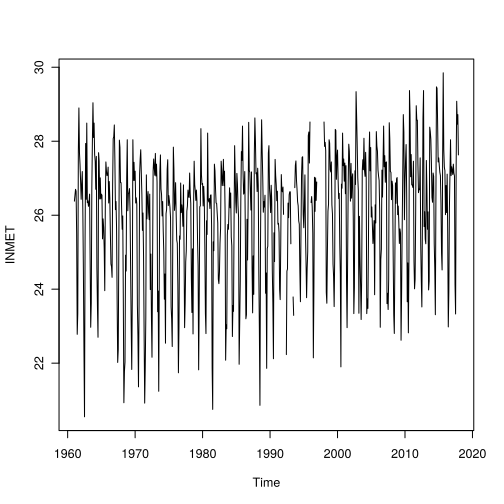

In [13]:
INMET <- ts(T$INMET,start=c(1961,1),f=12)
INMET
plot(INMET)

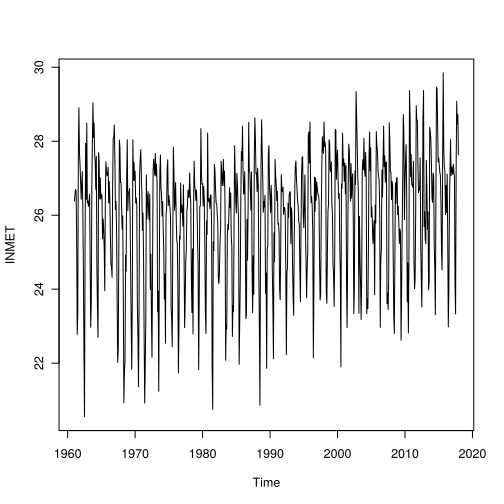

In [14]:
# As falhas que sobraram foram preenchidas pelo estimador de Kalman.
INMET <- na.kalman(INMET, model = "auto.arima")
plot(INMET)

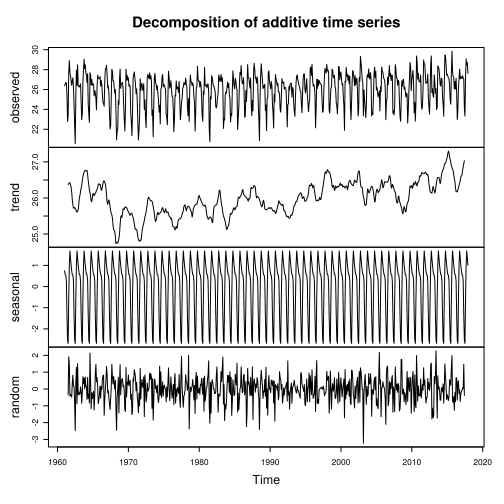

In [15]:
# Decomposição da série temporal (aditiva, possivelmente baseada na transformáda rápida de Fourier, e apenas para fins de análise preliminar)
plot(decompose(INMET))

# ARIMA

Etapas:
a) Verificar se existe a necessidade de uma transformação na série original, com objetivo de estabilizar a variância;
b) Tornar a série estacionária por meio de diferenças, de modo que o processo dZt seja reduzido a um ARMA(p,q)
c) Identificar o processo ARMA(p,q) resultante.
d) Verificação da estacionariedade e da invertibilidade.


FAC : correlação simples entre Zt e Zt – k em função da defasagem k.
FACP: correlação entre Zt e Zt – k em função da defasagem k, filtrado o efeito de todas as outras defasagens sobre Zt e Zt – k.

FACP -> AR

D -> I

FAC -> MA

1- Número de AR (auto-regressivo) termos (p): termos AR são apenas defasagens da variável dependente. Por exemplo, se o símbolo p representa 5, os preditores de x (t) irá ser X (t-1) … .x (T-5).
2-  Número de MA (média móvel) termos (q): termos MA estão defasados erros de previsão na equação de predição. Por exemplo, se q é 5, os preditores para x (t) será E (t-1) … .e (t-5) onde e (i) é a diferença entre a média móvel ao valor imediato e real.
3- Número de Diferenças (d): Estes são o número de diferenças não sazonal, ou seja, neste caso, tomamos a primeira diferença de ordem. Assim, ou nós podemos passar essa variável e colocar d = 0, ou passar a variável original e coloca -d = 1. Ambos irão gerar mesmos resultados.

Notação: arima(p, d, q), sendo p relacionado a autocorrelação parcial, d a diferença entre os valores, q associado a autocorrelação).

In [16]:
ndiffs(INMET) # Valor de d para fazer a série estacionária.

1


Title:
 KPSS Unit Root Test

Test Results:
  NA

Description:
 Thu Dec  6 14:05:52 2018 by user: 


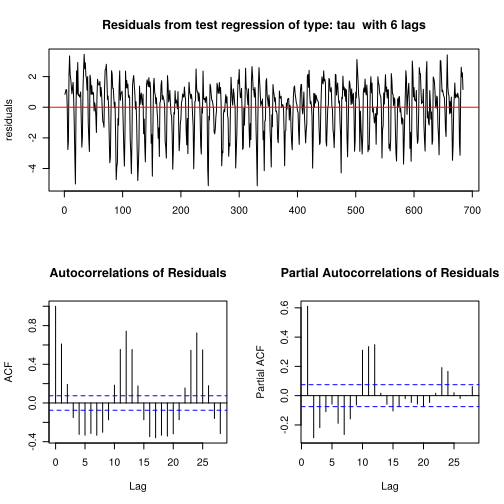

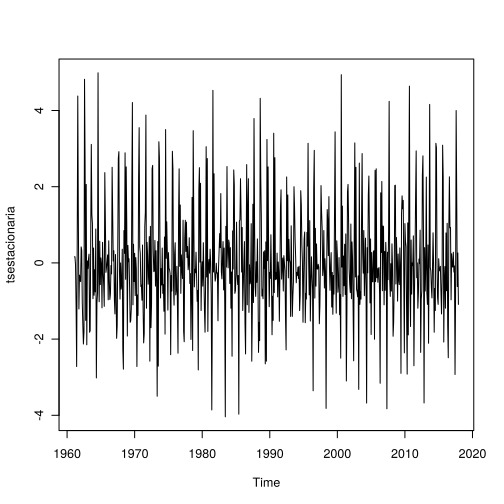

In [17]:
urkpssTest(INMET, type = c("tau"), lags = c("short"),use.lag = NULL, doplot = TRUE)
tsestacionaria = diff(INMET, differences=1)
plot(tsestacionaria)

In [18]:
# Teste da estacionariedade da série
adf.test(INMET, alternative="stationary")

Warning message in adf.test(INMET, alternative = "stationary"):
“p-value smaller than printed p-value”


	Augmented Dickey-Fuller Test

data:  INMET
Dickey-Fuller = -15.038, Lag order = 8, p-value = 0.01
alternative hypothesis: stationary


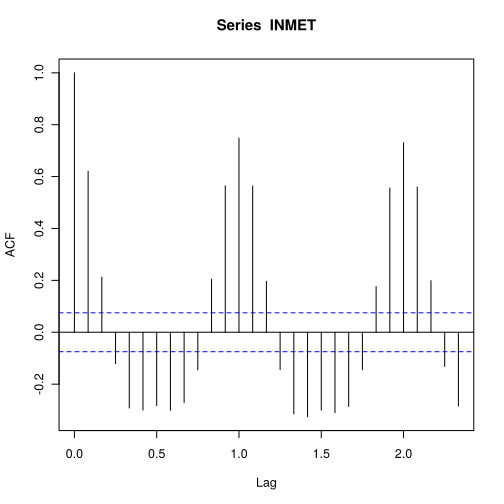

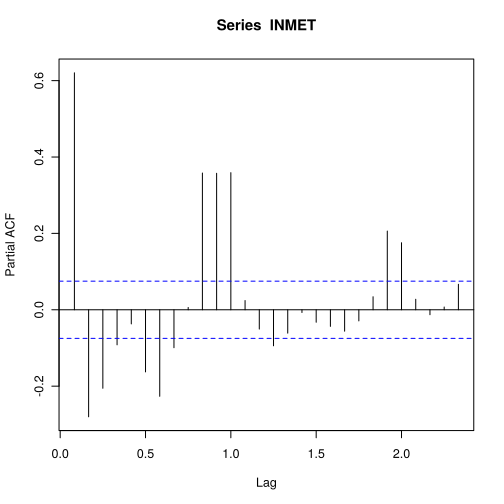

In [19]:
acf(INMET)
pacf(INMET)

O teste não rejeitou a hipótese da estacionariedade, mas o ACF e a função sugerem utilizar d=1.

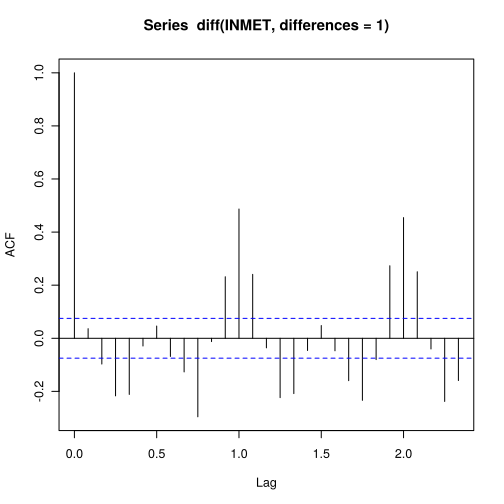

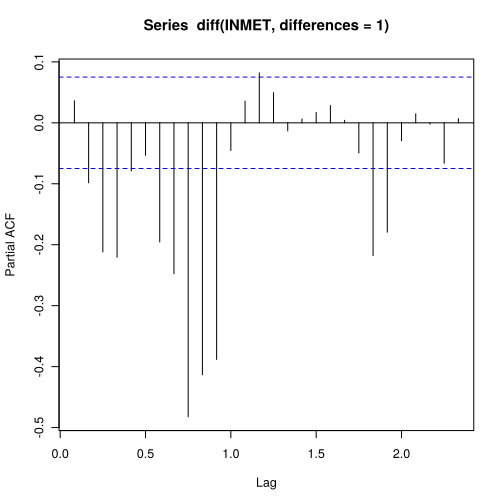

In [20]:
# Calculando as correlações para uma diferença de ordem 1
acf(diff(INMET, differences=1))
pacf(diff(INMET, differences=1))

Como o ACF cai depois do primeiro lag, podemos partir de p = 1.  Para o PACF o q poderia ser igual a 0, temos, então, um ARIMA(p, d, q) = ARIMA (1, 1, 0) com os mesmos parâmetros para sazonalidade.

In [21]:
ajuste_0 <- Arima(INMET, c(1, 1, 1))
ajuste_0

Series: INMET 
ARIMA(1,1,1) 

Coefficients:
          ar1     ma1
      -0.2652  0.3130
s.e.   0.4061  0.3994

sigma^2 estimated as 2.154:  log likelihood=-1230.11
AIC=2466.22   AICc=2466.26   BIC=2479.8

In [22]:
ajuste_1 <- Arima(INMET, c(1, 1, 1), seasonal=list(order = c(1, 1, 1), period = 12))
ajuste_1

Series: INMET 
ARIMA(1,1,1)(1,1,1)[12] 

Coefficients:
         ar1      ma1    sar1     sma1
      0.1792  -0.9649  0.0360  -0.9129
s.e.  0.0412   0.0143  0.0479   0.0322

sigma^2 estimated as 0.7475:  log likelihood=-864.86
AIC=1739.73   AICc=1739.82   BIC=1762.27

Utilizando o "automático"

In [23]:
# Automatizando
ajuste_auto <- auto.arima(INMET, stepwise=FALSE, approximation=FALSE, trace=TRUE)
ajuste_auto


 ARIMA(0,0,0)(0,1,0)[12]                    : 2101.997
 ARIMA(0,0,0)(0,1,0)[12] with drift         : 2103.936
 ARIMA(0,0,0)(0,1,1)[12]                    : 1777.447
 ARIMA(0,0,0)(0,1,1)[12] with drift         : 1776.128
 ARIMA(0,0,0)(0,1,2)[12]                    : 1779.456
 ARIMA(0,0,0)(0,1,2)[12] with drift         : 1777.932
 ARIMA(0,0,0)(1,1,0)[12]                    : 1916.368
 ARIMA(0,0,0)(1,1,0)[12] with drift         : 1918.209
 ARIMA(0,0,0)(1,1,1)[12]                    : 1779.455
 ARIMA(0,0,0)(1,1,1)[12] with drift         : 1777.902
 ARIMA(0,0,0)(1,1,2)[12]                    : Inf
 ARIMA(0,0,0)(1,1,2)[12] with drift         : 1780.115
 ARIMA(0,0,0)(2,1,0)[12]                    : 1841.745
 ARIMA(0,0,0)(2,1,0)[12] with drift         : 1843.425
 ARIMA(0,0,0)(2,1,1)[12]                    : 1780.857
 ARIMA(0,0,0)(2,1,1)[12] with drift         : Inf
 ARIMA(0,0,0)(2,1,2)[12]                    : 1783.475
 ARIMA(0,0,0)(2,1,2)[12] with drift         : Inf
 ARIMA(0,0,1)(0,1,0)[12]

Series: INMET 
ARIMA(2,0,1)(0,1,1)[12] 

Coefficients:
         ar1      ar2      ma1     sma1
      1.1203  -0.1462  -0.9194  -0.8870
s.e.  0.1073   0.0667   0.0910   0.0341

sigma^2 estimated as 0.7459:  log likelihood=-861.88
AIC=1733.76   AICc=1733.85   BIC=1756.31

No caso, obteve um AIC apenas um pouco melhor.

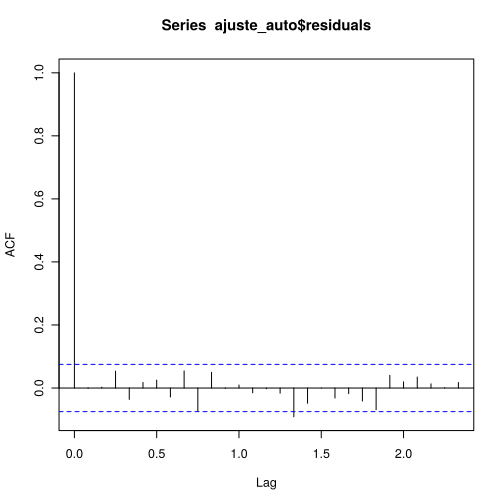

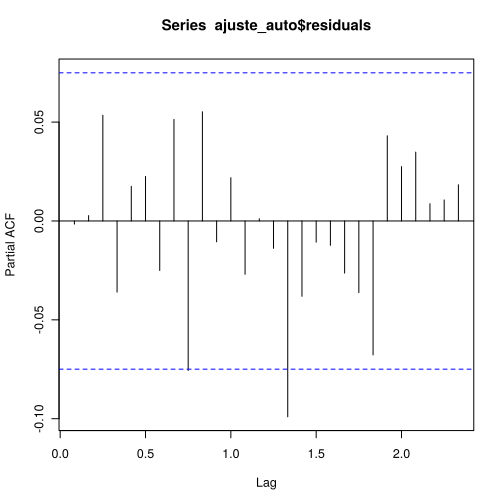

In [24]:
acf(ajuste_auto$residuals)
pacf(ajuste_auto$residuals)


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  ajuste_auto$residuals
D = 0.055364, p-value = 3.59e-05


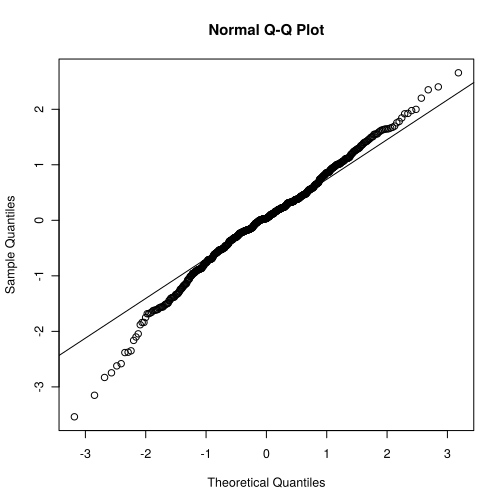

In [25]:
qqnorm(ajuste_auto$residuals)
qqline(ajuste_auto$residuals)
lillie.test(ajuste_auto$residuals)

https://stats.stackexchange.com/questions/101274/how-to-interpret-a-qq-plot

Não adere a Normal, mas também não apresenta comportamento anômalo. É o caso de tentar uma transformação de Box-Cox.

In [26]:
l <- BoxCox.lambda(INMET)
l

1.99992424816297

In [27]:
ajuste_auto_bc <- auto.arima(INMET, stepwise=FALSE, approximation=FALSE, trace=TRUE, lambda=l)
ajuste_auto_bc


 ARIMA(0,0,0)(0,1,0)[12]                    : 6459.492
 ARIMA(0,0,0)(0,1,0)[12] with drift         : 6461.425
 ARIMA(0,0,0)(0,1,1)[12]                    : 6130.443
 ARIMA(0,0,0)(0,1,1)[12] with drift         : 6129.316
 ARIMA(0,0,0)(0,1,2)[12]                    : 6132.377
 ARIMA(0,0,0)(0,1,2)[12] with drift         : 6131.338
 ARIMA(0,0,0)(1,1,0)[12]                    : 6269.231
 ARIMA(0,0,0)(1,1,0)[12] with drift         : 6271.07
 ARIMA(0,0,0)(1,1,1)[12]                    : 6132.373
 ARIMA(0,0,0)(1,1,1)[12] with drift         : 6131.338
 ARIMA(0,0,0)(1,1,2)[12]                    : 6134.386
 ARIMA(0,0,0)(1,1,2)[12] with drift         : 6133.339
 ARIMA(0,0,0)(2,1,0)[12]                    : 6190.466
 ARIMA(0,0,0)(2,1,0)[12] with drift         : 6192.138
 ARIMA(0,0,0)(2,1,1)[12]                    : 6134.065
 ARIMA(0,0,0)(2,1,1)[12] with drift         : 6132.104
 ARIMA(0,0,0)(2,1,2)[12]                    : 6136.426
 ARIMA(0,0,0)(2,1,2)[12] with drift         : 6135.332
 ARIMA(0,0

Series: INMET 
ARIMA(1,0,2)(0,1,1)[12] 
Box Cox transformation: lambda= 1.999924 

Coefficients:
         ar1      ma1      ma2     sma1
      0.9225  -0.7169  -0.1025  -0.8690
s.e.  0.0642   0.0740   0.0542   0.0299

sigma^2 estimated as 484.2:  log likelihood=-3037.08
AIC=6084.17   AICc=6084.26   BIC=6106.72


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  ajuste_auto_bc$residuals
D = 0.050203, p-value = 0.0003183


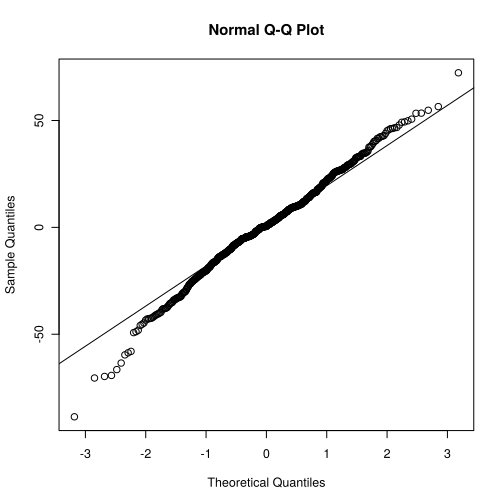

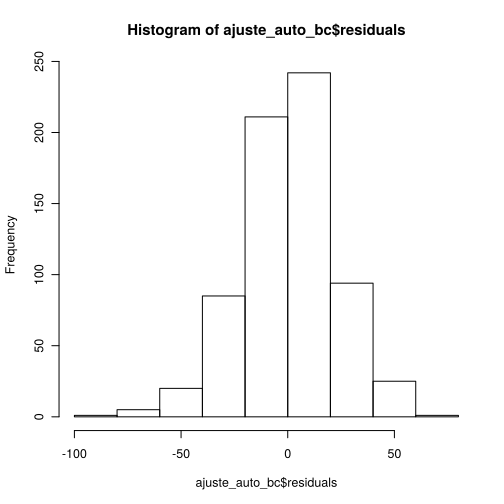

In [28]:
qqnorm(ajuste_auto_bc$residuals)
qqline(ajuste_auto_bc$residuals)
lillie.test(ajuste_auto_bc$residuals)
hist(ajuste_auto_bc$residuals)

Melhorou, mas ainda não adere a Normal. Tem outliers... Por hora, segue abaixo.

In [29]:
# A função arima não possue o parâmetro lambda
# outliers <- tso(BoxCox(INMET,l),tsmethod = "auto.arima", args.tsmethod = list(lambda=l), types = c("AO","LS","TC"))

In [30]:
outliers <- tso(BoxCox(INMET,l),tsmethod = "arima", args.tsmethod = list(order=c(1, 0, 2), seasonal=list(order=c(0, 1, 1), period=12)), types = c("AO","LS","TC"))

In [31]:
outliers


Call:
structure(list(method = NULL), .Names = "method")

Coefficients:
         ar1      ma1      ma2     sma1     AO507
      0.9210  -0.7180  -0.0957  -0.8664  -85.6234
s.e.  0.0591   0.0695   0.0524   0.0297   20.4189

sigma^2 estimated as 469.3:  log likelihood = -3028.46,  aic = 6068.92

Outliers:
  type ind    time coefhat  tstat
1   AO 507 2003:03  -85.62 -4.193

In [32]:
INMET[outliers$outliers$ind] <- NA

In [33]:
# Substituindo os outliers por estimativas...
INMET <- na.kalman(INMET, model = "auto.arima")

In [34]:
INMET

          Jan      Feb      Mar      Apr      May      Jun      Jul      Aug
1961 26.38000 26.54000 26.70000 26.65000 25.50000 22.78000 23.34000 27.72000
1962 26.43000 26.85000 27.18000 26.13000 24.49000 22.36000 20.55000 25.37000
1963 26.39000 26.24000 26.34000 26.57000 24.75000 22.97000 23.63000 26.74000
1964 27.64000 27.46000 26.70000 27.59000 24.57000 23.51000 22.70000 27.69000
1965 26.57000 26.54000 25.36000 25.90000 25.67000 25.10000 23.96000 26.33000
1966 27.30000 26.33000 26.91000 26.45000 25.49000 24.68000 24.61000 24.32000
1967 27.49000 26.15000 26.37000 25.64000 23.66000 22.02000 22.37000 25.11000
1968 26.19000 25.62000 25.98000 23.72000 20.93000 21.78000 22.03000 24.92000
1969 26.58000 26.61000 26.72000 26.11000 24.55000 23.03000 21.83000 23.83000
1970 27.19000 26.33000 26.47000 26.30000 23.58000 22.74000 21.36000 23.56000
1971 26.57000 25.59000 26.06000 24.88000 22.78000 20.92000 21.88000 23.21000
1972 26.08000 25.88000 26.57000 23.99000 24.95000 23.25000 22.16000 24.63000

In [35]:
l <- BoxCox.lambda(INMET)
l

1.99992424816297

In [36]:
outliers2 <- tso(BoxCox(INMET,l),tsmethod = "arima", args.tsmethod = list(order=c(1, 0, 2), seasonal=list(order=c(0, 1, 1), period=12)), types = c("AO","LS","TC"))
outliers2


Call:
structure(list(method = NULL), .Names = "method")

Coefficients:
         ar1      ma1      ma2     sma1
      0.9200  -0.7173  -0.0948  -0.8660
s.e.  0.0589   0.0693   0.0521   0.0297

sigma^2 estimated as 469.3:  log likelihood = -3028.46,  aic = 6066.93

No outliers were detected.

In [37]:
# Reajustando
ajuste_auto_bc_outliers <- auto.arima(INMET, stepwise=FALSE, approximation=FALSE, trace=TRUE, lambda=l)
ajuste_auto_bc_outliers


 ARIMA(0,0,0)(0,1,0)[12]                    : 6435.896
 ARIMA(0,0,0)(0,1,0)[12] with drift         : 6437.827
 ARIMA(0,0,0)(0,1,1)[12]                    : 6114.469
 ARIMA(0,0,0)(0,1,1)[12] with drift         : 6113.411
 ARIMA(0,0,0)(0,1,2)[12]                    : 6116.485
 ARIMA(0,0,0)(0,1,2)[12] with drift         : 6115.348
 ARIMA(0,0,0)(1,1,0)[12]                    : 6254.366
 ARIMA(0,0,0)(1,1,0)[12] with drift         : 6256.202
 ARIMA(0,0,0)(1,1,1)[12]                    : 6116.485
 ARIMA(0,0,0)(1,1,1)[12] with drift         : 6115.341
 ARIMA(0,0,0)(1,1,2)[12]                    : 6118.508
 ARIMA(0,0,0)(1,1,2)[12] with drift         : 6117.428
 ARIMA(0,0,0)(2,1,0)[12]                    : 6174.55
 ARIMA(0,0,0)(2,1,0)[12] with drift         : 6176.217
 ARIMA(0,0,0)(2,1,1)[12]                    : 6118.397
 ARIMA(0,0,0)(2,1,1)[12] with drift         : 6116.586
 ARIMA(0,0,0)(2,1,2)[12]                    : 6120.492
 ARIMA(0,0,0)(2,1,2)[12] with drift         : 6119.407
 ARIMA(0,0

Series: INMET 
ARIMA(1,0,2)(0,1,1)[12] 
Box Cox transformation: lambda= 1.999924 

Coefficients:
         ar1      ma1      ma2     sma1
      0.9200  -0.7173  -0.0948  -0.8660
s.e.  0.0589   0.0693   0.0521   0.0297

sigma^2 estimated as 472.1:  log likelihood=-3028.46
AIC=6066.93   AICc=6067.02   BIC=6089.48


	Lilliefors (Kolmogorov-Smirnov) normality test

data:  ajuste_auto_bc_outliers$residuals
D = 0.048307, p-value = 0.000666


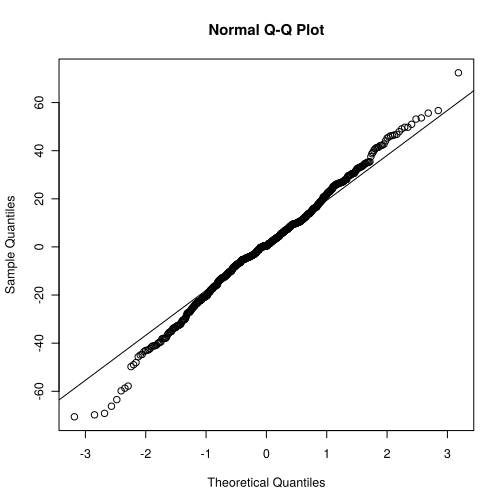

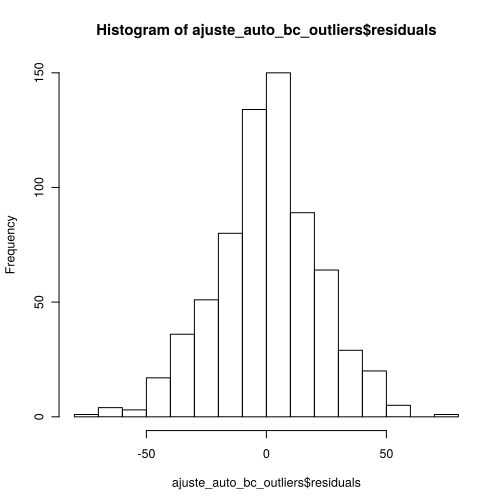

In [38]:
qqnorm(ajuste_auto_bc_outliers$residuals)
qqline(ajuste_auto_bc_outliers$residuals)
lillie.test(ajuste_auto_bc_outliers$residuals)
hist(ajuste_auto_bc_outliers$residuals)

Ainda tem 9 indivíduos que poderiam ser considerados outliers, mas paramos, por hora, por aqui. Verificar a possibilidade de bootstrap.

https://cran.r-project.org/web/packages/TSA/TSA.pdf

https://www.rdocumentation.org/packages/boot/versions/1.3-20/topics/tsboot


In [39]:
portest(ajuste_auto_bc_outliers$residuals) # Testes de portmanteau (ruído branco)

lags statistic p-value 
 
 5 2.042474 0.7622378 
 10 6.002297 0.6383616 
 15 10.464827 0.5104895 
 20 15.461162 0.4055944 
 25 20.134118 0.3546454 
 30 24.229868 0.3326673

In [40]:
# Testando diretamente
Box.test(ajuste_auto_bc$residuals, lag=20, type="Ljung-Box") # Testa se existe autocorrelação entre os resíduos


	Box-Ljung test

data:  ajuste_auto_bc$residuals
X-squared = 18.186, df = 20, p-value = 0.5751


         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2018       27.02914 25.96459 28.05332 25.38299 28.58063
Feb 2018       27.00269 25.91430 28.04888 25.31921 28.58721
Mar 2018       27.08752 25.99865 28.13429 25.40335 28.67295

ME RMSE MAE MPE MAPE MASE ACF1 
 
 Training set 0.01058867 0.8544344 0.6447901 -0.05951616 2.527899 0.7231742 -0.005222841

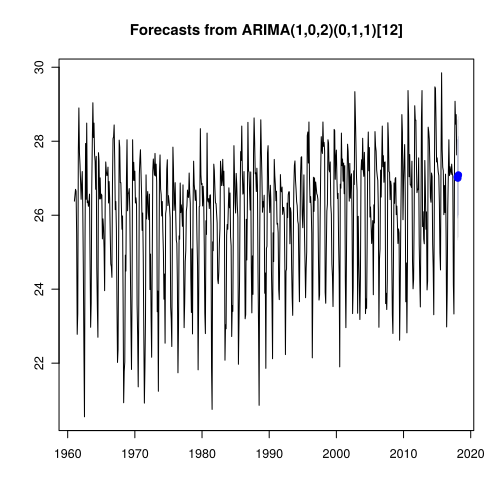

In [41]:
previsoes_auto_bc <- forecast(ajuste_auto_bc, h=3)
previsoes_auto_bc
accuracy(previsoes_auto_bc)
plot(previsoes_auto_bc)

In [42]:
library(boot)


In [43]:
AIC_Boot <- function(ts) {
    aux <- Arima(ts, lambda=l, order=c(1, 0, 2), seasonal=list(order=c(0, 1, 1), period=12))
    return(aux$aic)
}

In [44]:
aux <- Arima(INMET, lambda=l, order=c(1, 0, 2), seasonal=list(order=c(0, 1, 1), period=12))

In [45]:
AIC_Boot(INMET)

6066.92790473731

In [46]:
# Bootstrap estacionário com bloco de 20
boot_ajuste_auto_bc_outliers <- tsboot(INMET, AIC_Boot, R = 99, l = 20, sim = "geom")

In [47]:
boot_ajuste_auto_bc_outliers


STATIONARY BOOTSTRAP FOR TIME SERIES

Average Block Length of 20 

Call:
tsboot(tseries = INMET, statistic = AIC_Boot, R = 99, l = 20, 
    sim = "geom")


Bootstrap Statistics :
    original   bias    std. error
t1* 6066.928 577.0108    51.53266

In [48]:
boot.ci(boot_ajuste_auto_bc_outliers)

Warning message in boot.ci(boot_ajuste_auto_bc_outliers):
“bootstrap variances needed for studentized intervals”

Warning message in boot.ci(boot_ajuste_auto_bc_outliers):
“BCa intervals not defined for time series bootstraps”

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 99 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_ajuste_auto_bc_outliers)

Intervals : 
Level      Normal              Basic              Percentile     
95%   (5389, 5591 )   (5390, 5602 )   (6532, 6743 )  
Calculations and Intervals on Original Scale
Some basic intervals may be unstable
Some percentile intervals may be unstable